## This is a model based on a classiconvNet and on a Data augmentation that gaves a better result (accuracy77%)on the validation set.

In [ ]:
#Importing packages and libraries
import keras
import keras.utils
import sklearn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, MaxPool2D, Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import (
    BatchNormalization, MaxPooling2D)
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/15-Scene/'

one_hot_lookup = np.eye(15) # 15 classes

dataset_x = []
dataset_y = []

for category in sorted(os.listdir(DATASET_PATH)):
    print('loading category: '+str(int(category)))
    for fname in os.listdir(DATASET_PATH+category):
        img = cv2.imread(DATASET_PATH+category+'/'+fname, 2)
        img = cv2.resize(img, (224,224))
        dataset_x.append(np.reshape(img, [224,224,1]))
        dataset_y.append(np.reshape(one_hot_lookup[int(category)], [15]))

dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)
####shuffling dataset
p = np.random.permutation(len(dataset_x))
dataset_x = dataset_x[p]
dataset_y = dataset_y[p]
        
X_test = dataset_x[:int(len(dataset_x)/10)]
Y_test = dataset_y[:int(len(dataset_x)/10)]
X_train = dataset_x[int(len(dataset_x)/10):]
Y_train = dataset_y[int(len(dataset_x)/10):]

loading category: 0
loading category: 1
loading category: 2
loading category: 3
loading category: 4
loading category: 5
loading category: 6
loading category: 7
loading category: 8
loading category: 9
loading category: 10
loading category: 11
loading category: 12
loading category: 13
loading category: 14


In [ ]:
### Model architecture
from keras.backend import learning_phase
batch_size = 64
num_classes = 15
epochs = 100
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation = "softmax"))
# Defining  the optimizer
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#The early stopping to reduce the variance and to avoid the overfitting of the model
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
optimizer = Adam(learning_rate=0.001, decay=1e-6)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)  
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64),validation_data=(X_test, Y_test),steps_per_epoch=len(X_train) / 64, epochs=epochs)
score = model.evaluate(X_test,Y_test, verbose=1)

print('\nAccuracy:', score[1])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      1

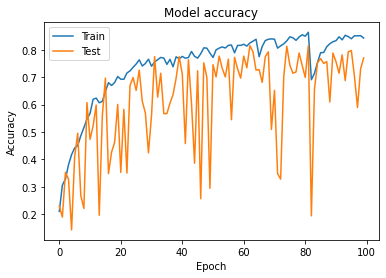

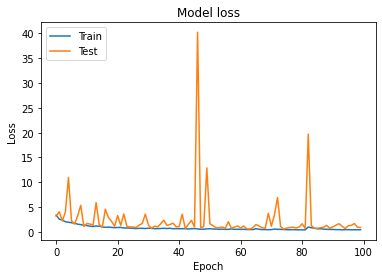

In [ ]:
# Ploting training & validation accuracy value

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
    
# Ploting training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()